In [1]:
# !pip install kafka-python


In [77]:
# Kafka Configuration
from kafka import KafkaProducer, KafkaConsumer
import json
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt

import os 
cwd = os.getcwd() 

KAFKA_TOPIC = "test-topic"
KAFKA_BOOTSTRAP_SERVERS = 'localhost:9092'

In [78]:
file_path = f"{cwd}/archive-2/streaming_activity.csv"
timestamp_format = "%Y-%m-%d %H:%M:%S"

dataset = pd.read_csv(file_path)
print(dataset.head())

   index                              SongID     TimeStamp_Central  \
0      0        Twenty Five MilesEdwin Starr  5/25/2021 5:18:00 PM   
1      1              Devil's EyesGreyhounds  5/25/2021 5:15:00 PM   
2      2                 Pussy and PizzaMurs  5/25/2021 5:12:00 PM   
3      3  Opera (feat. Method Man)King Green  5/25/2021 5:08:00 PM   
4      4                  Sweet PotatoMouthe  5/25/2021 5:05:00 PM   

     Performer                     Album                      Song  \
0  Edwin Starr                  25 Miles         Twenty Five Miles   
1   Greyhounds            Change of Pace              Devil's Eyes   
2         Murs          Have a Nice Life           Pussy and Pizza   
3   King Green  Opera (feat. Method Man)  Opera (feat. Method Man)   
4       Mouthe                      NUVO              Sweet Potato   

           TimeStamp_UTC  
0  5/25/2021 11:18:00 PM  
1  5/25/2021 11:15:00 PM  
2  5/25/2021 11:12:00 PM  
3  5/25/2021 11:08:00 PM  
4  5/25/2021 11:05:00 P

In [79]:
len(dataset)

62907

In [80]:
print(dataset.columns)

Index(['index', 'SongID', 'TimeStamp_Central', 'Performer', 'Album', 'Song',
       'TimeStamp_UTC'],
      dtype='object')


In [103]:
sample_data

[{'index': 36589,
  'SongID': 'FaintLinkin Park',
  'TimeStamp_Central': '2/14/2019 4:25:00 PM',
  'Performer': 'Linkin Park',
  'Album': 'Meteora',
  'Song': 'Faint',
  'TimeStamp_UTC': '2/14/2019 10:25:00 PM'},
 {'index': 22880,
  'SongID': 'La fille du régiment / Act 1: Pour mon âme quel destinGaetano Donizetti',
  'TimeStamp_Central': '1/2/2020 9:00:00 AM',
  'Performer': 'Gaetano Donizetti',
  'Album': 'Pavarotti - The Greatest Hits',
  'Song': 'La fille du régiment / Act 1: Pour mon âme quel destin',
  'TimeStamp_UTC': '1/2/2020 3:00:00 PM'},
 {'index': 23749,
  'SongID': 'Secret GardenSway Clarke',
  'TimeStamp_Central': '12/6/2019 10:47:00 AM',
  'Performer': 'Sway Clarke',
  'Album': 'Secret Garden',
  'Song': 'Secret Garden',
  'TimeStamp_UTC': '12/6/2019 4:47:00 PM'},
 {'index': 36481,
  'SongID': 'Altered StatesMC Lars',
  'TimeStamp_Central': '2/16/2019 3:20:00 PM',
  'Performer': 'MC Lars',
  'Album': 'Single and Famous',
  'Song': 'Altered States',
  'TimeStamp_UTC': '2/

In [104]:
sample_data = dataset.sample(50).to_dict(orient='records')
# sample_data = dataset.to_dict(orient='records')

# Kafka Producer
producer = KafkaProducer(
    bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,
    value_serializer=lambda x: json.dumps(x).encode('utf-8')
)

for record in sample_data:
    try:
        producer.send(KAFKA_TOPIC, value=record)
        time.sleep(1)
    except Exception as e:
        print("Failed to send record:", e)

producer.flush()
print("Sent", len(sample_data), "records")

# producer.close()

Sent 50 records


In [105]:
# Kafka connsumer
consumer = KafkaConsumer(
    KAFKA_TOPIC,
    bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,
    auto_offset_reset='earliest',
    enable_auto_commit=True,
    group_id='streaming-analysis-group',
    consumer_timeout_ms=5000,
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

records = []
for message in consumer:
    records.append(message.value)
    print(message.value)
    if len(records) >= len(sample_data):
        break

{'index': 0, 'SongID': 'Twenty Five MilesEdwin Starr', 'TimeStamp_Central': '5/25/2021 5:18:00 PM', 'Performer': 'Edwin Starr', 'Album': '25 Miles', 'Song': 'Twenty Five Miles', 'TimeStamp_UTC': '5/25/2021 11:18:00 PM'}
{'index': 1, 'SongID': "Devil's EyesGreyhounds", 'TimeStamp_Central': '5/25/2021 5:15:00 PM', 'Performer': 'Greyhounds', 'Album': 'Change of Pace', 'Song': "Devil's Eyes", 'TimeStamp_UTC': '5/25/2021 11:15:00 PM'}
{'index': 2, 'SongID': 'Pussy and PizzaMurs', 'TimeStamp_Central': '5/25/2021 5:12:00 PM', 'Performer': 'Murs', 'Album': 'Have a Nice Life', 'Song': 'Pussy and Pizza', 'TimeStamp_UTC': '5/25/2021 11:12:00 PM'}
{'index': 3, 'SongID': 'Opera (feat. Method Man)King Green', 'TimeStamp_Central': '5/25/2021 5:08:00 PM', 'Performer': 'King Green', 'Album': 'Opera (feat. Method Man)', 'Song': 'Opera (feat. Method Man)', 'TimeStamp_UTC': '5/25/2021 11:08:00 PM'}
{'index': 4, 'SongID': 'Sweet PotatoMouthe', 'TimeStamp_Central': '5/25/2021 5:05:00 PM', 'Performer': 'Mout

In [106]:
records

[{'index': 0,
  'SongID': 'Twenty Five MilesEdwin Starr',
  'TimeStamp_Central': '5/25/2021 5:18:00 PM',
  'Performer': 'Edwin Starr',
  'Album': '25 Miles',
  'Song': 'Twenty Five Miles',
  'TimeStamp_UTC': '5/25/2021 11:18:00 PM'},
 {'index': 1,
  'SongID': "Devil's EyesGreyhounds",
  'TimeStamp_Central': '5/25/2021 5:15:00 PM',
  'Performer': 'Greyhounds',
  'Album': 'Change of Pace',
  'Song': "Devil's Eyes",
  'TimeStamp_UTC': '5/25/2021 11:15:00 PM'},
 {'index': 2,
  'SongID': 'Pussy and PizzaMurs',
  'TimeStamp_Central': '5/25/2021 5:12:00 PM',
  'Performer': 'Murs',
  'Album': 'Have a Nice Life',
  'Song': 'Pussy and Pizza',
  'TimeStamp_UTC': '5/25/2021 11:12:00 PM'},
 {'index': 3,
  'SongID': 'Opera (feat. Method Man)King Green',
  'TimeStamp_Central': '5/25/2021 5:08:00 PM',
  'Performer': 'King Green',
  'Album': 'Opera (feat. Method Man)',
  'Song': 'Opera (feat. Method Man)',
  'TimeStamp_UTC': '5/25/2021 11:08:00 PM'},
 {'index': 4,
  'SongID': 'Sweet PotatoMouthe',
  'T

In [107]:
# Convert to DataFrame
df = pd.DataFrame(records)
df['timestamp'] = pd.to_datetime(df['TimeStamp_UTC'], errors='coerce')
# print(df.head())

/var/folders/_b/l_819g5924d_y00npn9gt60h0000gn/T/ipykernel_84428/2809224821.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['TimeStamp_UTC'], errors='coerce')


In [108]:
summary = (df.groupby('Performer')
           .size()
           .reset_index(name='plays')
           .sort_values('plays', ascending=False))

print("Number of plays per performer:")
print(summary)

Number of plays per performer:
                                        Performer  plays
0                                     Daily Bread      5
1                                     Edwin Starr      5
2                                      Greyhounds      5
3                                    Honey Hounds      5
4                                      King Green      5
5                                      Moontricks      5
6                                          Mouthe      5
7                                            Murs      5
8                                       The Heavy      5
9  The Presidents of the United States of America      5


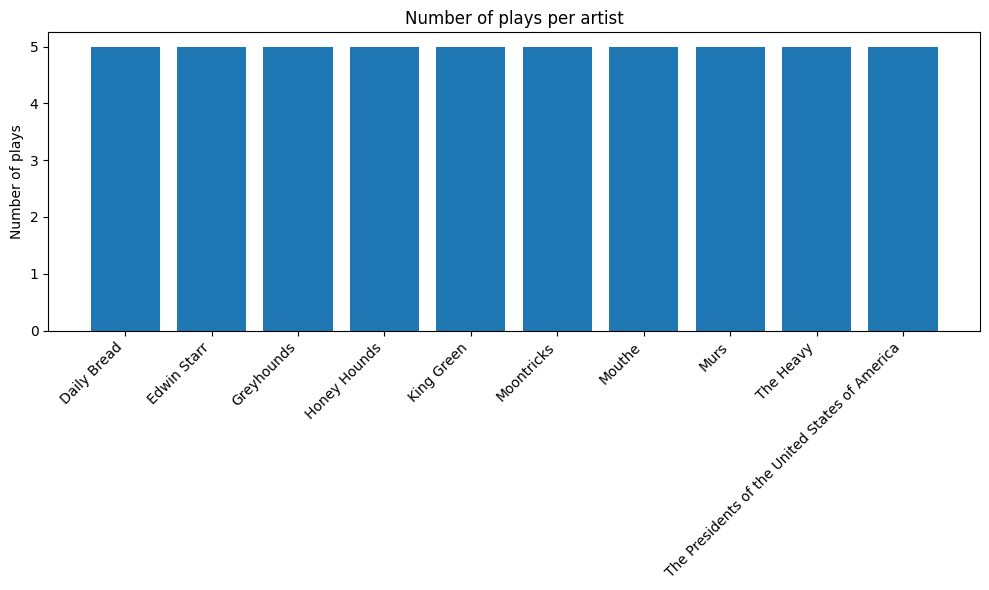

In [110]:
plt.figure(figsize=(10,6))
plt.bar(summary['Performer'], summary['plays'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of plays')
plt.title('Number of plays per artist')
plt.tight_layout()
summary = (df.groupby('Performer')
           .size()
           .reset_index(name='plays')
           .sort_values('plays', ascending=False))

plt.show()

Number of plays per album:
                              Album  plays
0                          25 Miles      5
1                        All I Know      5
2         Big Beat Ignition: Denver      5
3                    Change of Pace      5
4             Freaked Out And Small      5
5  Great Vengeance and Furious Fire      5
6                  Have a Nice Life      5
7                              NUVO      5
8                          No Sleep      5
9          Opera (feat. Method Man)      5


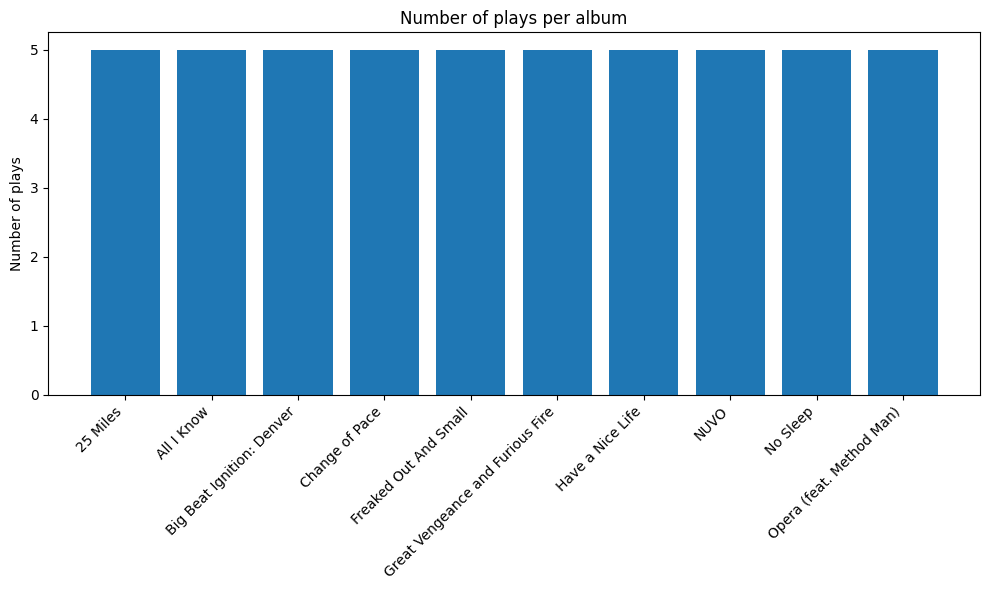

In [111]:
summary = (df.groupby('Album')
           .size()
           .reset_index(name='plays')
           .sort_values('plays', ascending=False))

print("Number of plays per album:")
print(summary)

plt.figure(figsize=(10,6))
plt.bar(summary['Album'], summary['plays'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of plays')
plt.title('Number of plays per album')
plt.tight_layout()
plt.show()

/var/folders/_b/l_819g5924d_y00npn9gt60h0000gn/T/ipykernel_84428/2288234957.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample('1T')  # '1T' = 1-minute intervals; use '10S' for 10-second bins


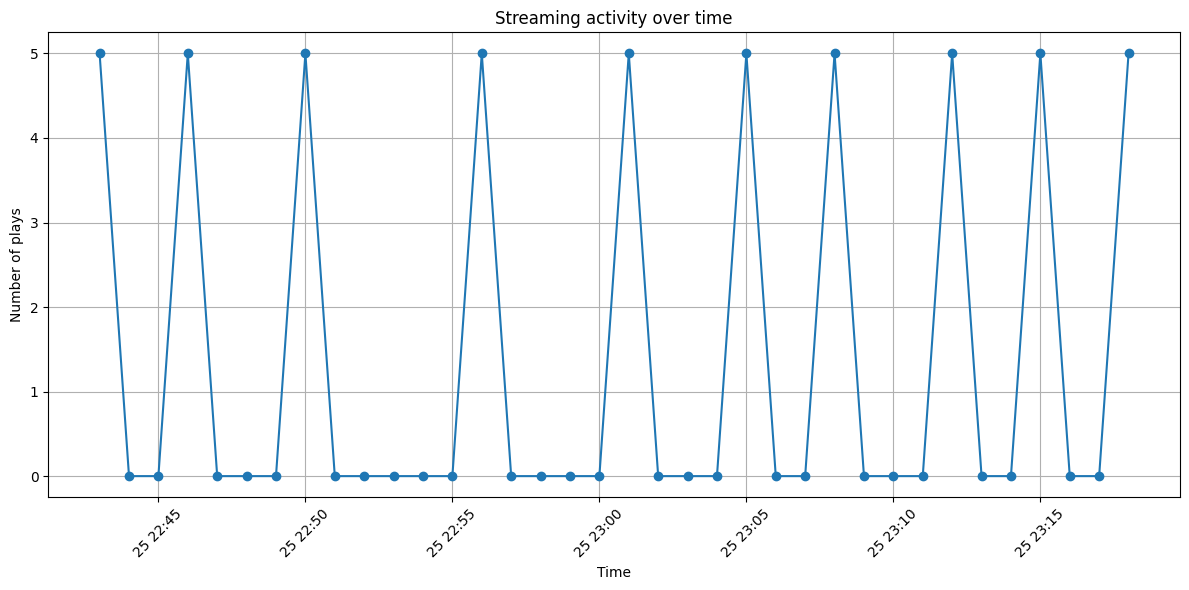

In [114]:
activity_summary = (df
    .set_index('timestamp')
    .resample('1T')  # '1T' = 1-minute intervals
    .size()
    .reset_index(name='plays'))

plt.figure(figsize=(12, 6))
plt.plot(activity_summary['timestamp'], activity_summary['plays'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Number of plays')
plt.title('Streaming activity over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()